# 신규 민간 아파트 분양가

 * 2013년부터 2018년까지 부동산 가격의 변동추세가 아파트 분양가에 반영이 되는지를 알아보고자 함

## 데이터 로드

In [1]:
import pandas as pd

#최근 분양가 파일 로드
df_last=pd.read_csv("C:\\Users\\user7\\Desktop\\data\\data1\\주택도시보증공사_전국 평균 분양가격(2019년 12월).csv",encoding="cp949")

#행,열 갯수 파악
df_last.shape

(4335, 5)

In [2]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [3]:
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


In [4]:
#2013-2015년 분양가격 데이터 로드
df_first=pd.read_csv("C:\\Users\\user7\\Desktop\\data\\data1\\전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv",encoding="cp949")

In [5]:
df_first.shape

(17, 22)

In [6]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [7]:
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


## 데이터 전처리

In [8]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


* 지역명, 규모구분, 연도,월은 데이터의 개수가 4335개인데 분양가격만 4058개임을 확인함을 통해 결측치의 존재를 파악

### 결측치 확인

In [9]:
df_last.isnull()

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4330,False,False,False,False,False
4331,False,False,False,False,True
4332,False,False,False,False,False
4333,False,False,False,False,True


In [10]:
#결측치 갯수 구하기

True==1
False==0

df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

### 데이터 타입 변경
* 분양가격이 object(문자)타입이므로 수치 데이터로 변경
* .astype(int)는 결측치가 섞인 상태라면 변환이 되지않는다. 따라서 pd.to_numeric을 이용하고 error를 무시하고 강제로 출력함

In [11]:
df_last["분양가격"]=pd.to_numeric(df_last["분양가격(㎡)"],errors='coerce')
df_last["분양가격"]

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331       NaN
4332    3898.0
4333       NaN
4334    3601.0
Name: 분양가격, Length: 4335, dtype: float64

In [12]:
type(pd.np.nan)

<ipython-input-12-e71c757bba12>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  type(pd.np.nan)


float

### 평당 분양 가격 구하기
* 2013-2015년 데이터는 평당 분양 가격 기준이므로 최근데이터의 분양가격에 3.3을 곱한 평당분양가격 컬럼을 추가함

In [13]:
df_last["평당분양가격"]=df_last["분양가격"]*3.3
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


### 분양 가격 요약

In [14]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [15]:
df_last["분양가격(㎡)"].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [16]:
df_last["분양가격"].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

* 중앙값은 2874인데 최댓값이 굉장히 커서 평균값이 중앙값보다 큰 3238 이 나옴

### 데이터 간결화
* 규모구분 칼럼은 전용면적에 관한 데이터이다. 규모구분이란 단어보다 전용면적이 더 직관적이므로 칼럼이름을 전용면적이라고 새로 만들고 기존 전용면적이라는 단어와 초과,이하라는 불필요한 단어는 제거함
* 60초과 85이하는 60~80으로 변경

In [17]:
df_last["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [18]:
df_last["규모구분"]

0                      전체
1              전용면적 60㎡이하
2        전용면적 60㎡초과 85㎡이하
3       전용면적 85㎡초과 102㎡이하
4             전용면적 102㎡초과
              ...        
4330                   전체
4331           전용면적 60㎡이하
4332     전용면적 60㎡초과 85㎡이하
4333    전용면적 85㎡초과 102㎡이하
4334          전용면적 102㎡초과
Name: 규모구분, Length: 4335, dtype: object

In [19]:
df_last["전용면적"]=df_last["규모구분"].str.replace("전용면적","")
df_last["전용면적"]=df_last["전용면적"].str.replace("초과","~")
df_last["전용면적"]=df_last["전용면적"].str.replace("이하","")
df_last["전용면적"]=df_last["전용면적"].str.replace(" ","").str.strip() #앞 뒤 공백도 제거(str.strip)
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

### 필요없는 칼럼 제거

* 규모구분, 분양가격(㎡) 은 필요없음

In [20]:
df_last=df_last.drop(["규모구분","분양가격(㎡)"],axis=1) #행은 0, 열은 1

In [21]:
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


## 데이터 집계

* 지역명으로 분양가격의 평균을 그리고 막대그래프로 시각화

In [22]:
df_last.groupby(["지역명"])["평당분양가격"].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [23]:
df_last.groupby(["지역명"])["평당분양가격"].describe()

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,242.0,7890.750000,1044.359840,6639.6,7165.950,7581.75,8281.350,11873.4
경기,250.0,13356.895200,1969.310711,10160.7,11729.025,13168.65,14600.025,18711.0
경남,247.0,9268.778138,1356.695327,7260.0,8233.500,9187.20,9698.700,14199.9
경북,241.0,8376.536515,850.823275,6949.8,7728.600,8335.80,8824.200,11408.1
광주,201.0,9951.535821,1506.593261,7428.3,9068.400,9527.10,10800.900,16107.3
대구,242.0,11980.895455,2018.395637,8259.9,10399.950,11904.75,13330.350,17021.4
대전,198.0,10253.333333,2245.370020,8002.5,8580.000,9401.70,11615.175,16094.1
부산,250.0,12087.121200,1447.322754,9669.0,10709.325,12338.70,12972.300,15255.9
서울,250.0,23599.976400,3969.953218,16701.3,21318.825,22497.75,25072.575,42002.4


In [24]:
# 전용면적으로 평당분양가격의 평균
df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [25]:
df_last.groupby(["지역명","전용면적"])["평당분양가격"].mean().round()

지역명  전용면적    
강원   102㎡~       8311.0
     60㎡         7567.0
     60㎡~85㎡     7486.0
     85㎡~102㎡    8750.0
     전체          7478.0
                  ...  
충북   102㎡~       8195.0
     60㎡         7103.0
     60㎡~85㎡     7264.0
     85㎡~102㎡    8391.0
     전체          7219.0
Name: 평당분양가격, Length: 85, dtype: float64

In [26]:
df_last.groupby(["전용면적","지역명"])["평당분양가격"].mean().unstack().round() #unstack은 데이터프레임으로 바꿔줌

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [27]:
g=df_last.groupby(["연도","지역명"])["평당분양가격"].mean().unstack().round()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.0,11061.0,8459.0,7464.0,7917.0,9019.0,8191.0,10377.0,20316.0,8765.0,9368.0,10976.0,6799.0,7110.0,7951.0,7690.0,6829.0
2016,7163.0,11685.0,8497.0,7753.0,9191.0,10282.0,8911.0,10744.0,21753.0,8858.0,9583.0,11099.0,6937.0,6907.0,9567.0,7958.0,7133.0
2017,7274.0,12305.0,8787.0,8281.0,9614.0,12207.0,9957.0,11561.0,21831.0,9133.0,10667.0,11641.0,7373.0,7399.0,12567.0,8198.0,7473.0
2018,8219.0,14258.0,9328.0,8681.0,9527.0,12139.0,10234.0,12890.0,23202.0,10340.0,10241.0,11882.0,7930.0,8175.0,11936.0,8202.0,8149.0
2019,8934.0,15666.0,10698.0,9050.0,12112.0,14082.0,12619.0,13538.0,28287.0,11299.0,10216.0,13250.0,8219.0,8532.0,11828.0,8749.0,7971.0


In [28]:
df_last.groupby(["연도","지역명"])["평당분양가격"].mean().unstack().round().T # .T를 하면 행과 열을 바꿈


연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.0,7163.0,7274.0,8219.0,8934.0
경기,11061.0,11685.0,12305.0,14258.0,15666.0
경남,8459.0,8497.0,8787.0,9328.0,10698.0
경북,7464.0,7753.0,8281.0,8681.0,9050.0
광주,7917.0,9191.0,9614.0,9527.0,12112.0
대구,9019.0,10282.0,12207.0,12139.0,14082.0
대전,8191.0,8911.0,9957.0,10234.0,12619.0
부산,10377.0,10744.0,11561.0,12890.0,13538.0
서울,20316.0,21753.0,21831.0,23202.0,28287.0


* pivot table 사용 

In [29]:
pd.pivot_table(df_last,index=["지역명"],values=["평당분양가격"],aggfunc="mean")

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [30]:
pd.pivot_table(df_last,index=["전용면적"],values=["평당분양가격"],aggfunc="mean")

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [31]:
df_last.pivot_table(index="전용면적",columns="지역명",values="평당분양가격",aggfunc="mean").round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [32]:
p=pd.pivot_table(df_last,index=["연도","지역명"],values="평당분양가격").round()
p.loc[2018]

,평당분양가격
지역명,
강원,8219.0
경기,14258.0
경남,9328.0
경북,8681.0
광주,9527.0
대구,12139.0
대전,10234.0
부산,12890.0
서울,23202.0


## 데이터 시각화
### pandas 시각화

In [43]:
import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")

In [57]:
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [52]:
g=df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
g

지역명
서울    23599.976400
경기    13356.895200
부산    12087.121200
대구    11980.895455
인천    11915.320732
제주    11241.276712
대전    10253.333333
울산    10014.902013
광주     9951.535821
세종     9796.516456
경남     9268.778138
경북     8376.536515
충남     8233.651883
강원     7890.750000
전북     7724.235484
충북     7634.655600
전남     7565.316532
Name: 평당분양가격, dtype: float64

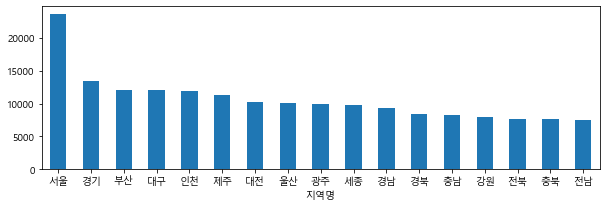

In [53]:
g.plot.bar(rot=0,figsize=(10,3)) #rot=0 : 글자 가로로 

* 전용면적별 분양가격의 평균값

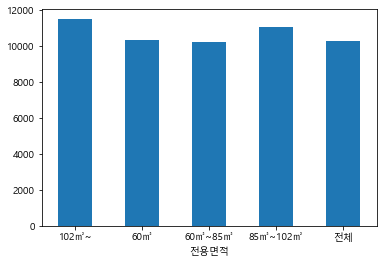

In [56]:
df_last.groupby(["전용면적"])["평당분양가격"].mean().plot.bar(rot=0)

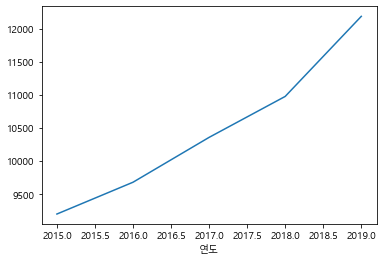

In [60]:
df_last.groupby(["연도"])["평당분양가격"].mean().plot()

* 연도가 지날 수록 평당 분양가격이 높아지는 추세임을 파악

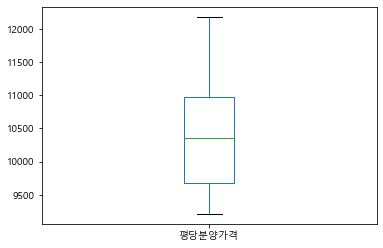

In [62]:
df_last.pivot_table(index="연도",values="평당분양가격").plot.box()

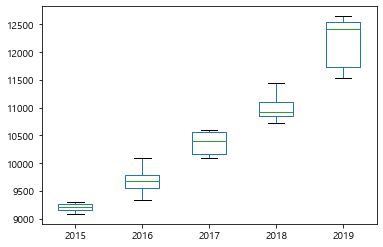

In [64]:
df_last.pivot_table(index="월",columns="연도",values="평당분양가격").plot.box()

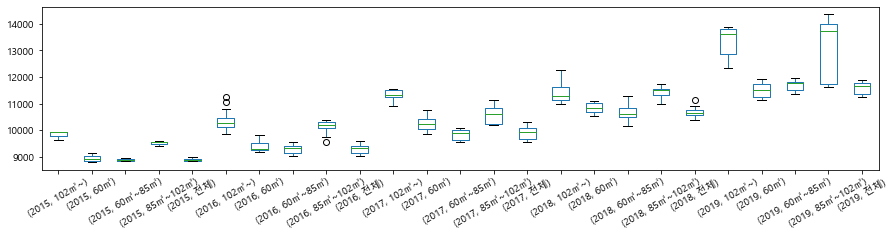

In [66]:
p=df_last.pivot_table(index="월",columns=["연도","전용면적"],values="평당분양가격")
p.plot.box(figsize=(15,3),rot=30)

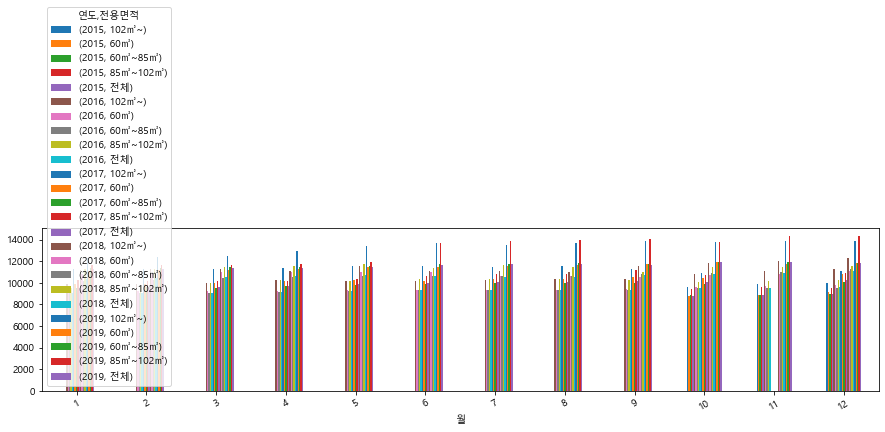

In [67]:
p.plot.bar(figsize=(15,3),rot=30)

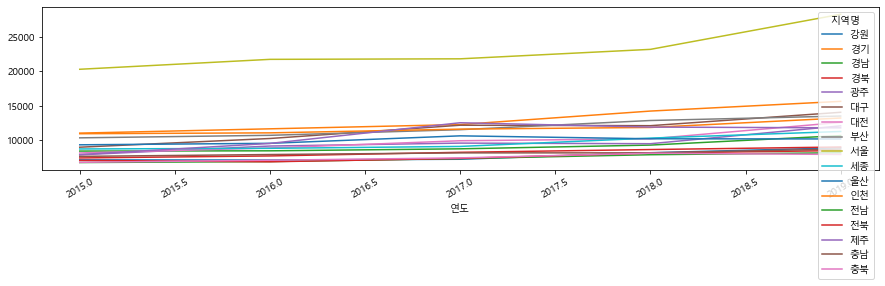

In [70]:
p=df_last.pivot_table(index="연도",columns=["지역명"],values="평당분양가격")
p.plot.line(figsize=(15,3),rot=30)

### seaborn 시각화

In [72]:
import seaborn as sns

%matplotlib inline

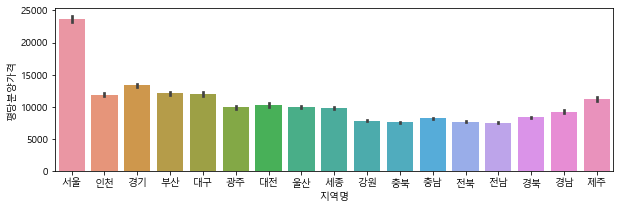

In [75]:
plt.figure(figsize=(10,3))
sns.barplot(data=df_last,x="지역명",y="평당분양가격",ci=95) #ci:신뢰구간

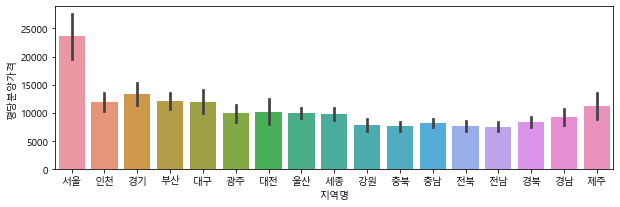

In [76]:
plt.figure(figsize=(10,3))
sns.barplot(data=df_last,x="지역명",y="평당분양가격",ci="sd") #ci="sd" 표준편차

* 서울, 경기 같은 곳이 편차가 크다. 보통 분양가가 많이 상승한 지역이 표준편차가 크다.

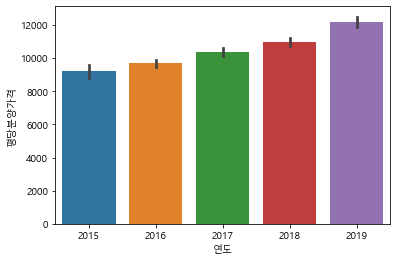

In [78]:
# barplot으로 연도별 평당분양가격 그래프

sns.barplot(data=df_last,x="연도",y="평당분양가격")

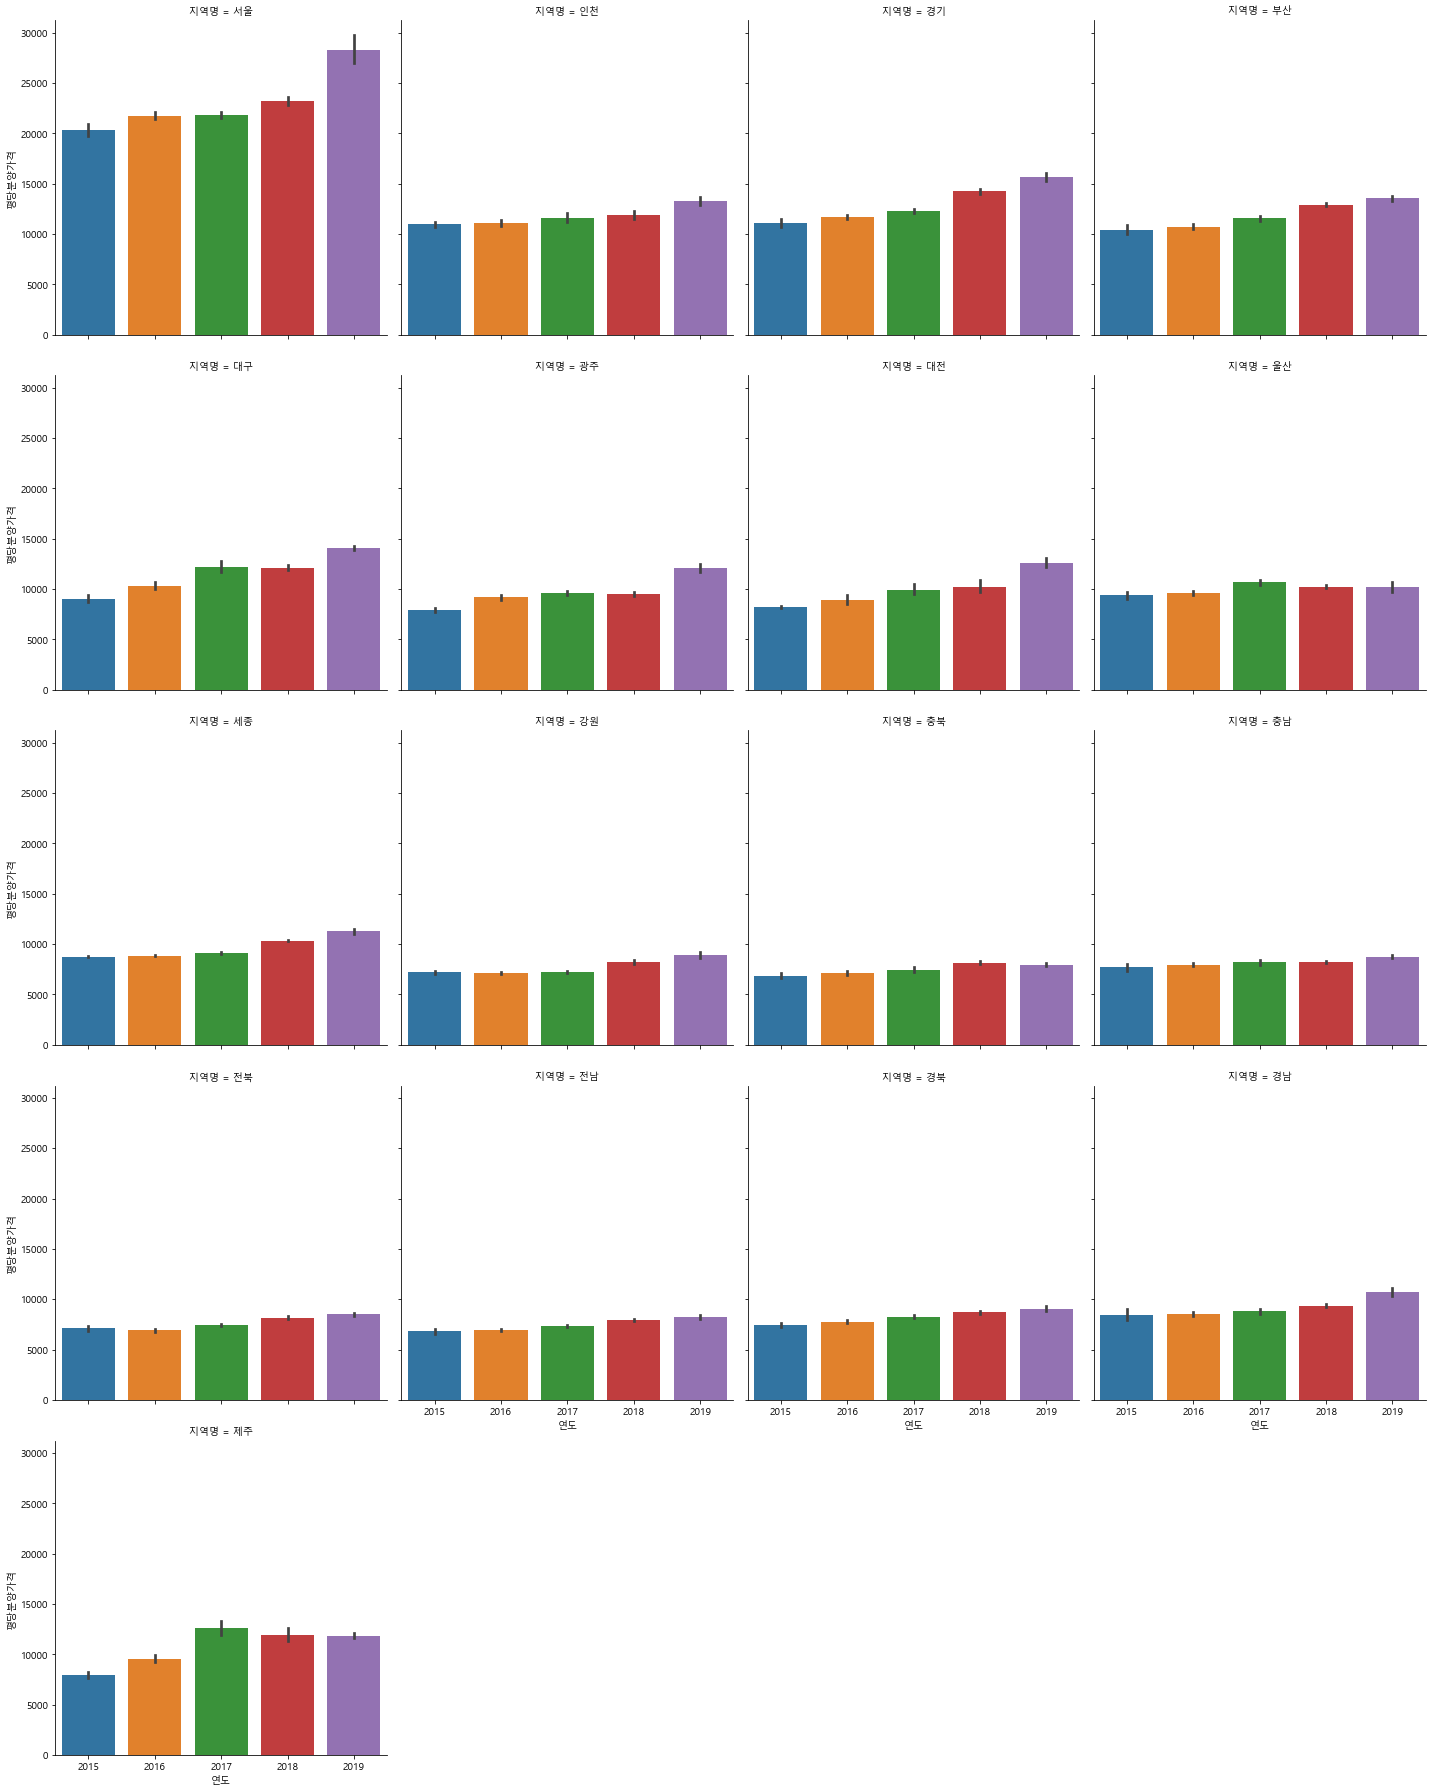

In [89]:
#catplot은 subplot을 그리기 가능
sns.catplot(data=df_last,x="연도",y="평당분양가격",kind="bar",col="지역명",col_wrap=4)

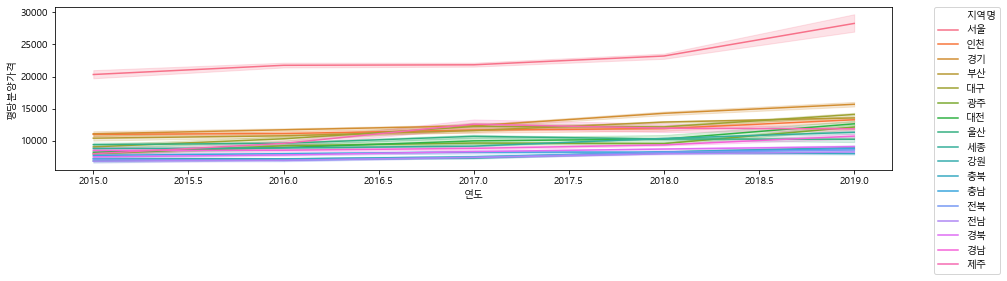

In [82]:
plt.figure(figsize=(15,3))
sns.lineplot(data=df_last,x="연도",y="평당분양가격",hue="지역명")
#hue 옵션으로 지역별로 다르게 표시 가능

#legend를 표 밖으로 이동시키는 코드
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

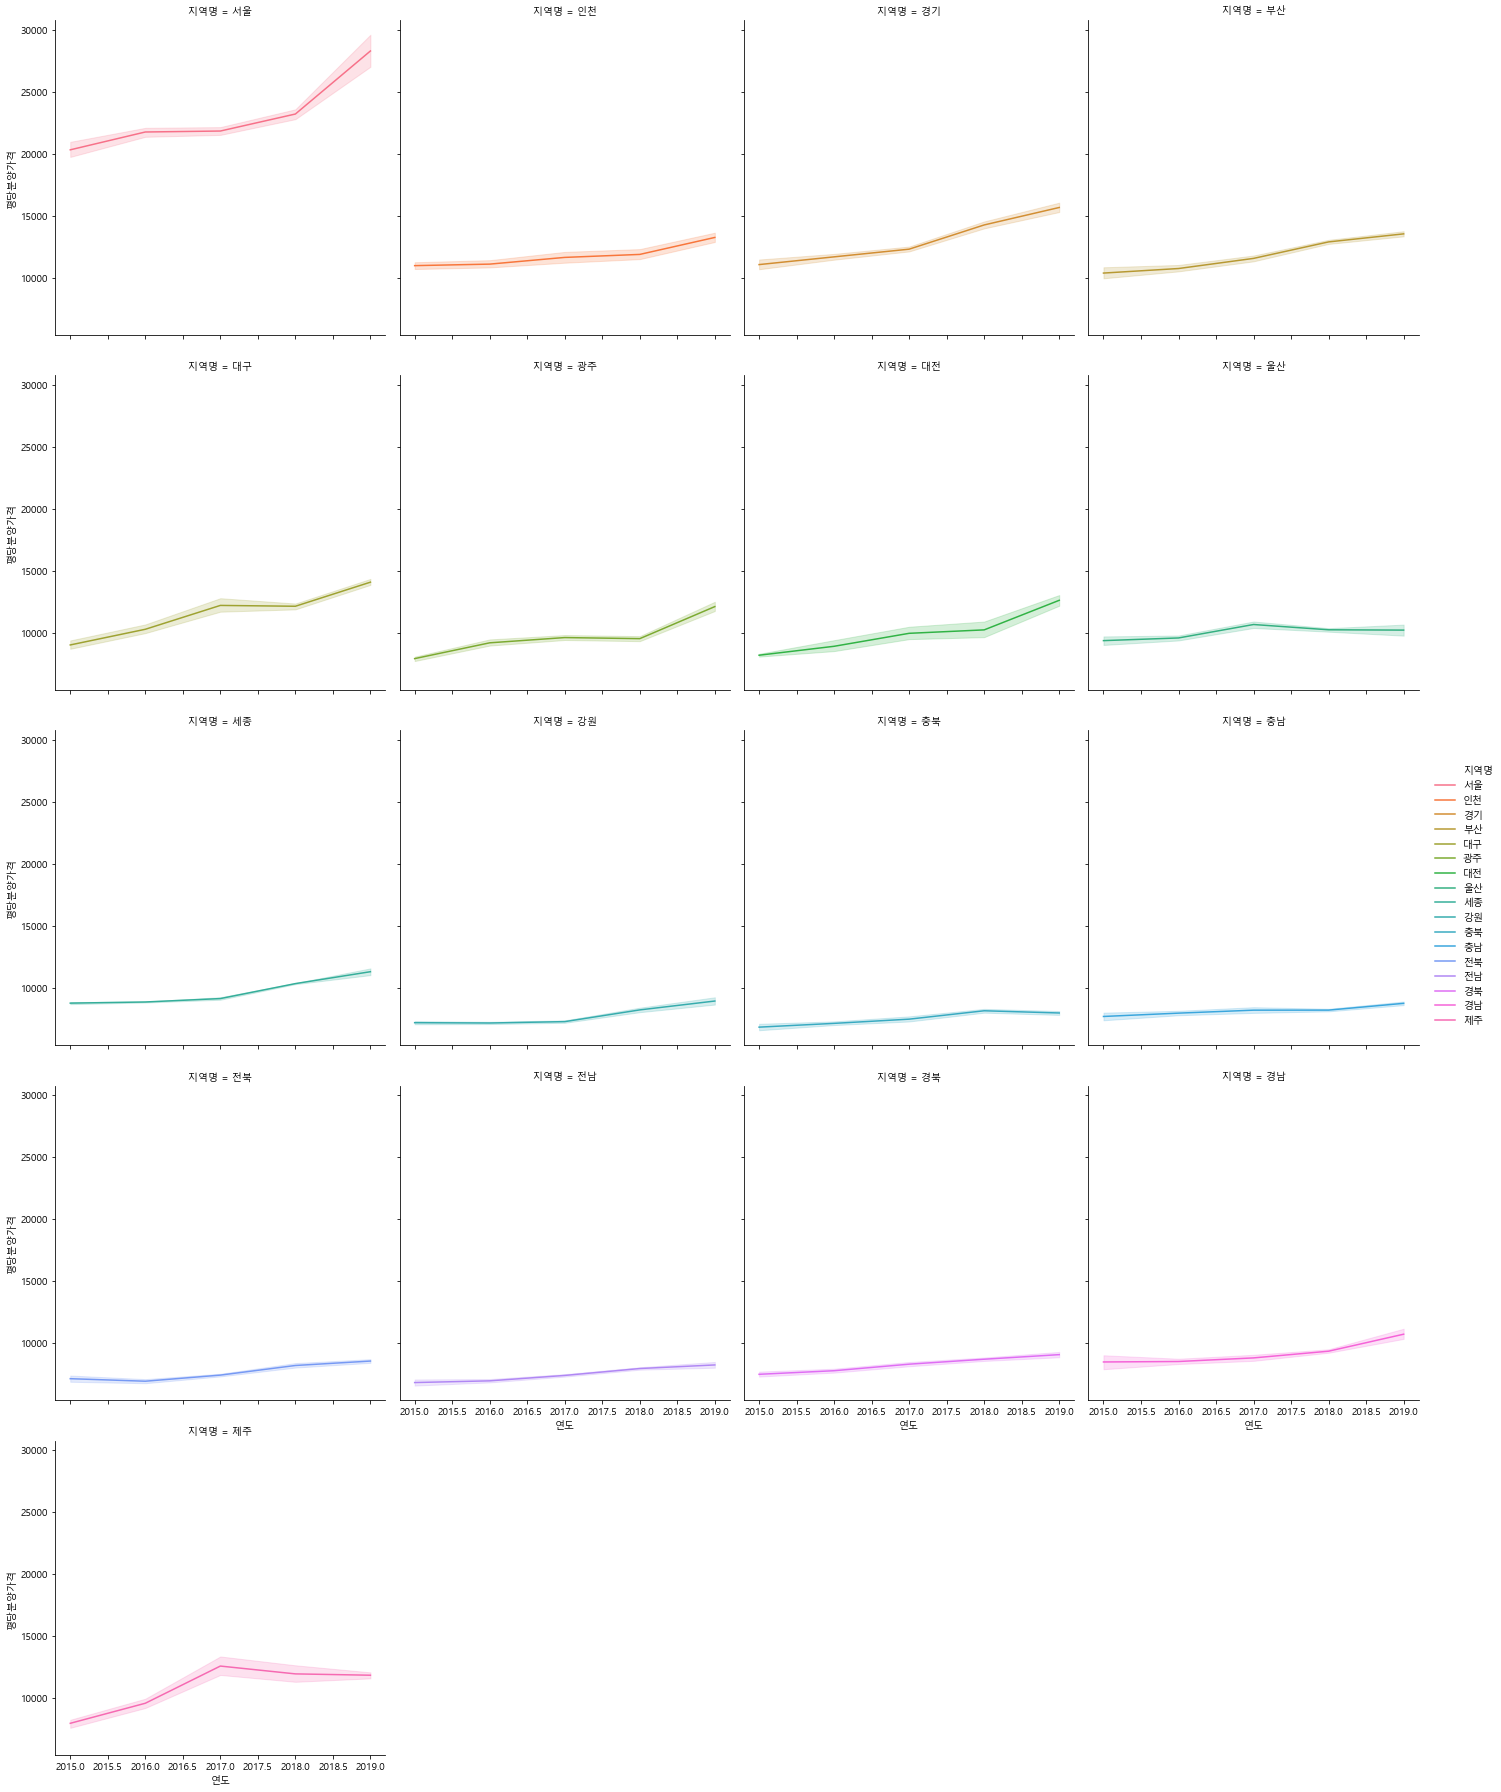

In [87]:
#relplot은 lineplot의 subplot을 그리기 가능

sns.relplot(data=df_last,x="연도",y="평당분양가격",kind="line",hue="지역명",col="지역명",col_wrap=4)

* 전반적으로는 평당분양가격이 증가하는 추세

### boxplot, violinplot

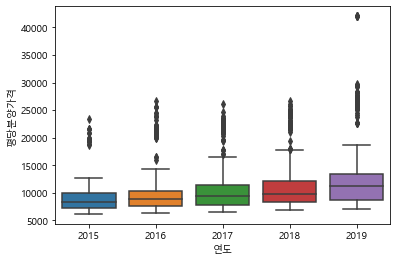

In [91]:
#연도별 평당 분양 가격

sns.boxplot(data=df_last, x="연도",y="평당분양가격")

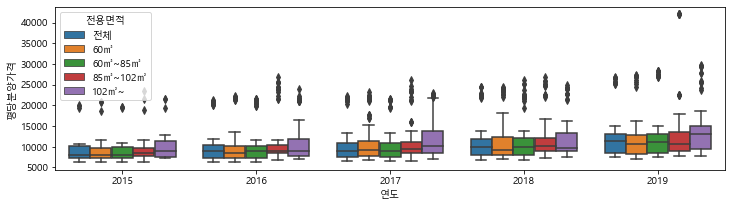

In [95]:
plt.figure(figsize=(12,3))
sns.boxplot(data=df_last, x="연도",y="평당분양가격",hue="전용면적")

* 면적이 큰 곳은 편차가 조금 큰 편

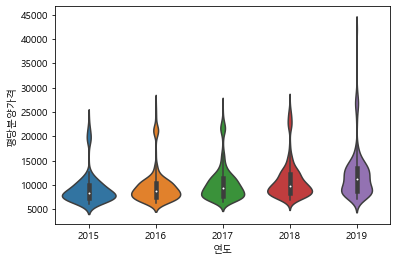

In [98]:
sns.violinplot(data=df_last, x="연도",y="평당분양가격")

* violinplot은 밀도도 파악 가능

### lmplot, swarmplot

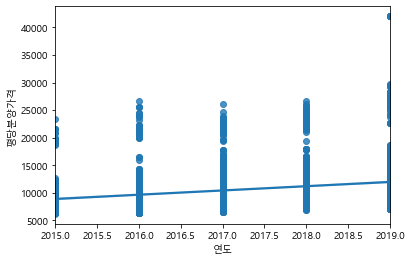

In [102]:
#regplot은 scatterplot에 회귀선을 그려줌

sns.regplot(data=df_last, x="연도", y="평당분양가격")

* 약간의 양의 상관관계

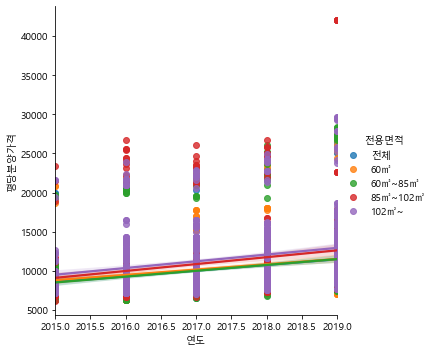

In [103]:
sns.lmplot(data=df_last, x="연도", y="평당분양가격",hue="전용면적")

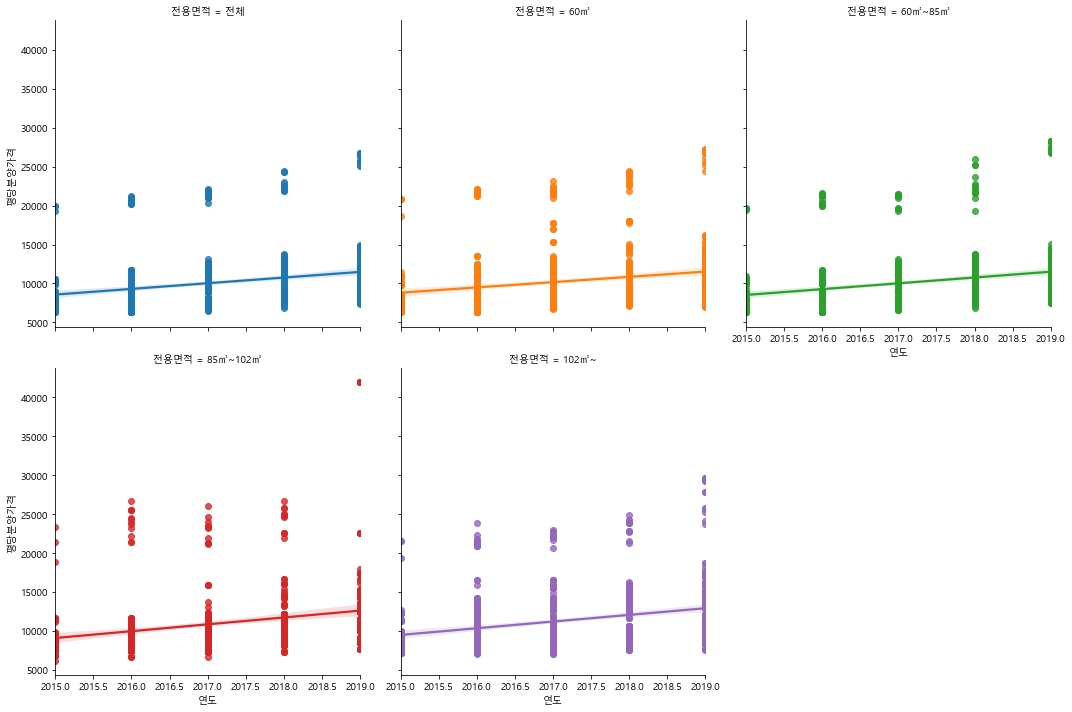

In [105]:
# lmplot은 col=""을 통해 subplot 생성 가능
# x축,y축이 수치데이터일때 주로 사용

sns.lmplot(data=df_last, x="연도", y="평당분양가격",hue="전용면적",col="전용면적",col_wrap=3)

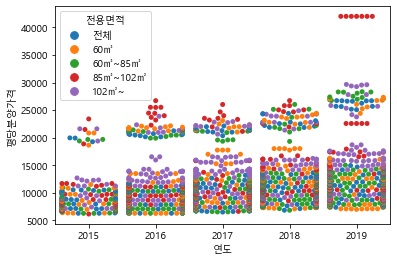

In [107]:
# x축 연도는 카테고리형 데이터에 더 가까우므로 swarmplot을 사용
# 점을 하나하나 다 찍음

sns.swarmplot(data=df_last,x="연도",y="평당분양가격", hue="전용면적")

### 이상치 확인

* 위에처럼 시각화를 하면 이상치 값을 파악하기 쉽다.

In [108]:
df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

* 평균 가격과 최대 가격이 차이가 많이 난다.
* 평균 가격과 중앙값도 차이가 많이 난다.
* 이상치가 영향을 준 것일 것

In [111]:
# 평당분양가격이 특히 높은 데이터가 존재

max_price=df_last["평당분양가격"].max()
max_price

42002.399999999994

In [112]:
df_last[df_last["평당분양가격"]==max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


* 이상치 값은 서울 가격임을 파악함

### 수치데이터 히스토그램

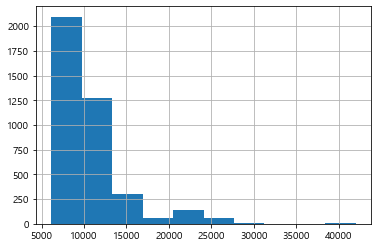

In [114]:
df_last["평당분양가격"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A737217F0>,
      dtype=object)

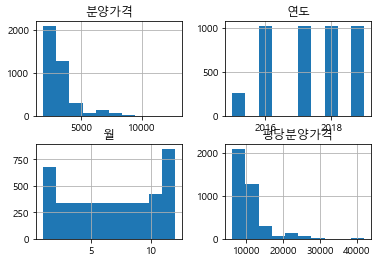

In [115]:
df_last.hist()

In [117]:
#결측치를 제외한 데이터만을 추출
price=df_last.loc[df_last["평당분양가격"].notnull(),"평당분양가격"]

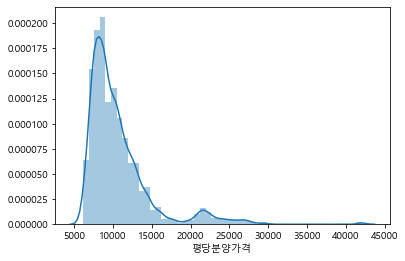

In [118]:
sns.distplot(price)

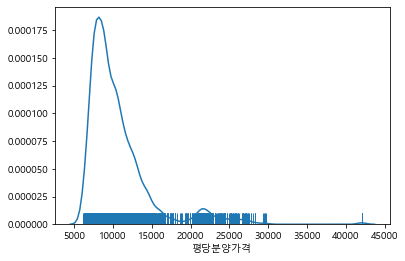

In [125]:
sns.distplot(price,hist=False,rug=True)

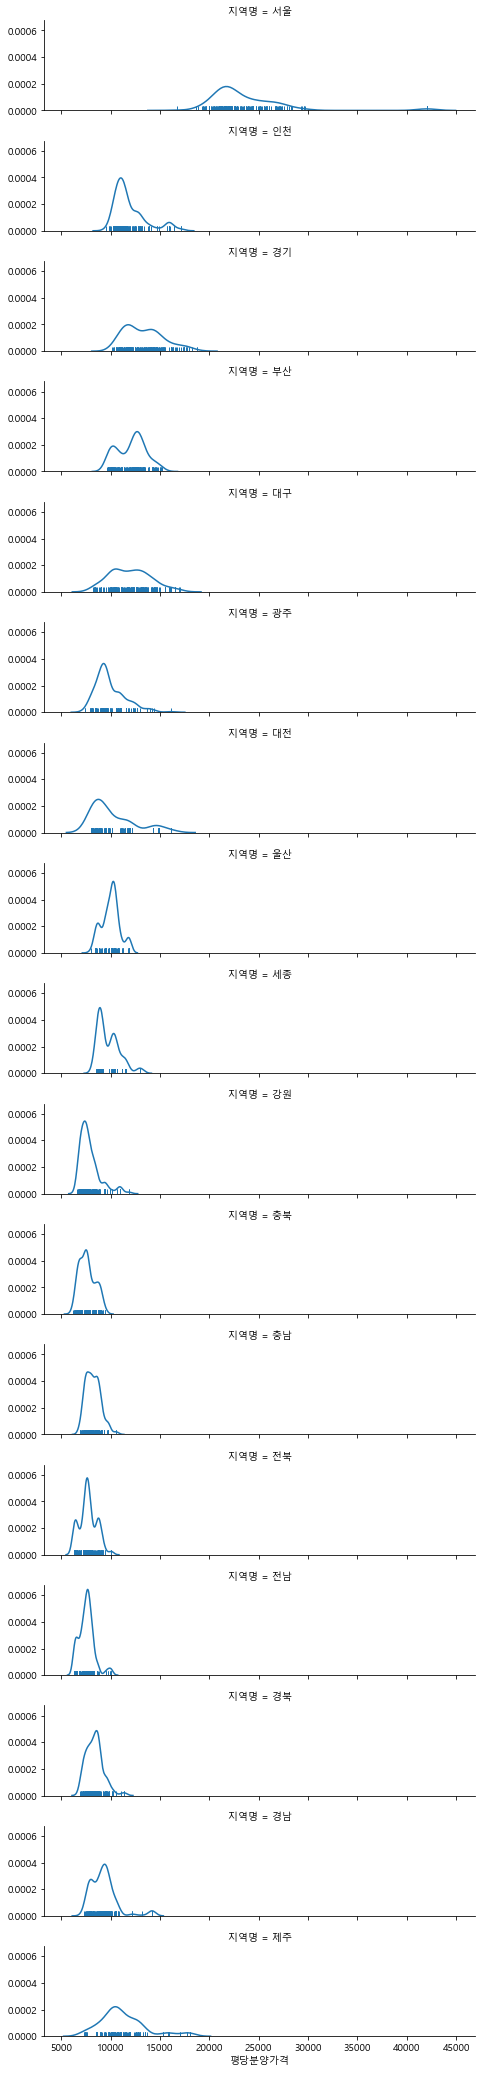

In [124]:
#subplot 으로도 표현

g=sns.FacetGrid(df_last, row="지역명", 
               height=1.7,aspect=4,)
g.map(sns.distplot,"평당분양가격",hist=False,rug=True);

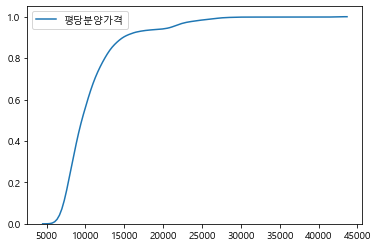

In [126]:
# cumulative=True : 누적 표현가능

sns.kdeplot(price,cumulative=True)

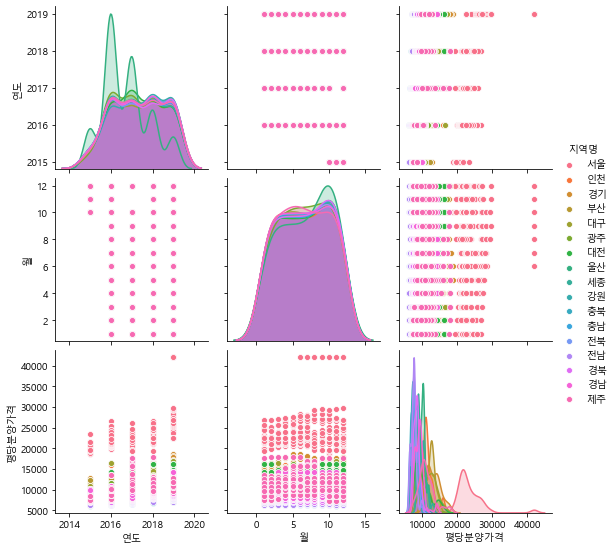

In [132]:
#pairplot
#.loc를 사용해야 특정 행과 열을 가져옴

df_last_notnull=df_last.loc[df_last["평당분양가격"].notnull(),["연도","월","평당분양가격","지역명","전용면적"]]
sns.pairplot(df_last_notnull, hue="지역명")

In [133]:
df_last["전용면적"].value_counts()

60㎡~85㎡     867
102㎡~       867
60㎡         867
85㎡~102㎡    867
전체          867
Name: 전용면적, dtype: int64

## 2015년 8월 이전 데이터 

In [139]:
pd.options.display.max_columns = 25 # 25개까지의 열을 보임
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [140]:
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


* 현재 last와 first의 데이터 내용이 다른점이 존재

In [137]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

### melt 사용으로 데이터 녹임

In [144]:
df_first_melt= df_first.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")
df_first_melt.head(2)

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111


In [145]:
df_first_melt.columns=["지역명","기간","평당분양가격"]
df_first_melt.head(2)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111


### 기간 데이터를 연도와 열 로 구분

In [156]:
data = df_first_melt["기간"][0]
data

'2013년12월'

In [148]:
data.split('년')

['2013', '12월']

In [157]:
data.split("년")[-1].replace("월","")

'12'

In [160]:
#연도만 반환하는 함수 정의

def parse_year(date):
    year=data.split("년")[0]
    year=int(year)
    return year

parse_year(data)

2013

In [161]:
#월 만 반환하는 함수 정의


def parse_month(date):
    month=data.split("년")[-1].replace("월","")
    month=int(month)
    return month

parse_month(data)

12

In [163]:
# df_first_melt 변수에 담긴 데이터프레임에서 연도만 추출하여 새로운 컬럼 추가

df_first_melt["연도"]=df_first_melt["기간"].apply(parse_year)
df_first_melt.head(2)

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013
1,부산,2013년12월,8111,2013


In [164]:
df_first_melt["월"]=df_first_melt["기간"].apply(parse_month)
df_first_melt.head(2)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12


In [165]:
df_last.head(2)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡


### last, first 데이터프레임 합치기위한 처리

In [167]:
df_last.columns.to_list()

['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적']

In [168]:
# 필요한 컬럼
cols=["지역명","연도","월","평당분양가격"]

In [172]:
df_last_prepare=df_last.loc[df_last["전용면적"]=="전체",cols].copy()
df_last_prepare.head(2)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9


In [174]:
df_first_prepare=df_first_melt[cols].copy()
df_first_prepare.head(2)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111


### first, last 데이터프레임 합치기

In [178]:
df=pd.concat([df_first_prepare,df_last_prepare])
df.head()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0


In [179]:
df.tail()

,지역명,연도,월,평당분양가격
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9
4330,제주,2019,12,12810.6


In [180]:
df["연도"].value_counts(sort=False)

2013    357
2015     51
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

### 합쳐진 데이터 pivot_table 분석

In [183]:
t=pd.pivot_table(df,index="연도",columns="지역명",values="평당분양가격").round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6471.0,10534.0,7075.0,6689.0,7643.0,8361.0,8193.0,9206.0,19004.0,8258.0,8585.0,10128.0,5836.0,6446.0,7707.0,6784.0,6657.0
2015,7160.0,10377.0,7586.0,7171.0,8052.0,9232.0,8098.0,10307.0,19725.0,8750.0,10053.0,10484.0,6317.0,6703.0,7405.0,7115.0,6645.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


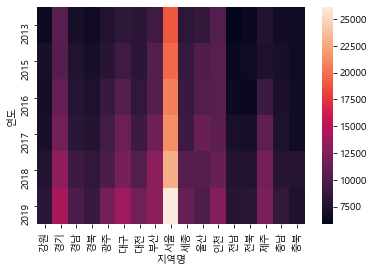

In [184]:
# 히트맵으로 표현
sns.heatmap(t)

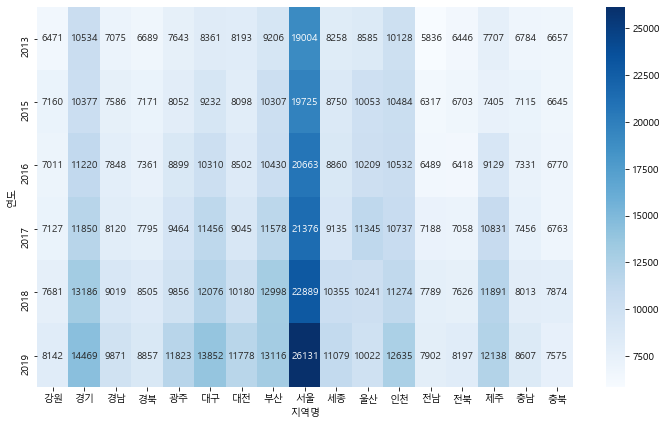

In [186]:
plt.figure(figsize=(12,7))
sns.heatmap(t,cmap="Blues",annot=True,fmt=".0f")

In [188]:
#행과 열 바꿈
t.T.head()

연도,2013,2015,2016,2017,2018,2019
지역명,,,,,,
강원,6471.0,7160.0,7011.0,7127.0,7681.0,8142.0
경기,10534.0,10377.0,11220.0,11850.0,13186.0,14469.0
경남,7075.0,7586.0,7848.0,8120.0,9019.0,9871.0
경북,6689.0,7171.0,7361.0,7795.0,8505.0,8857.0
광주,7643.0,8052.0,8899.0,9464.0,9856.0,11823.0


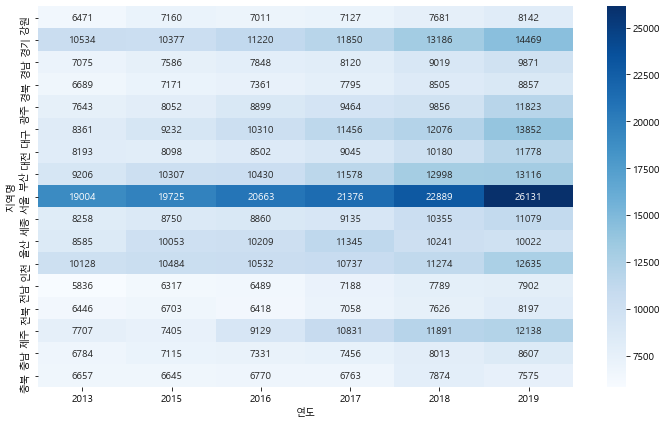

In [189]:
plt.figure(figsize=(12,7))
sns.heatmap(t.T,cmap="Blues",annot=True,fmt=".0f")

* 전체 분양가의 평균값이 해가 지날수록 오르는 추세

In [193]:
df.groupby(["연도","지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6471.0,10534.0,7075.0,6689.0,7643.0,8361.0,8193.0,9206.0,19004.0,8258.0,8585.0,10128.0,5836.0,6446.0,7707.0,6784.0,6657.0
2015,7160.0,10377.0,7586.0,7171.0,8052.0,9232.0,8098.0,10307.0,19725.0,8750.0,10053.0,10484.0,6317.0,6703.0,7405.0,7115.0,6645.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


### 합쳐진 데이터 시각화

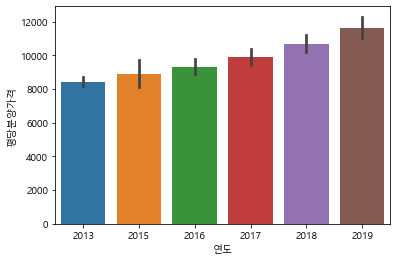

In [194]:
sns.barplot(data=df,x="연도",y="평당분양가격")

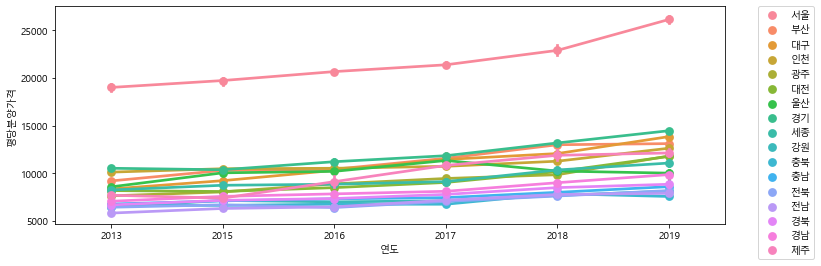

In [198]:
plt.figure(figsize=(12,4))
sns.pointplot(data=df,x="연도",y="평당분양가격",hue="지역명")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [200]:
#서울만 barplot

df_seoul = df[df["지역명"]=="서울"].copy()
print(df_seoul.shape)

(72, 4)


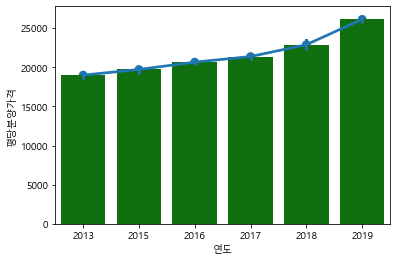

In [207]:
sns.barplot(data=df_seoul,x="연도",y="평당분양가격",color="g")
sns.pointplot(data=df_seoul,x="연도",y="평당분양가격")

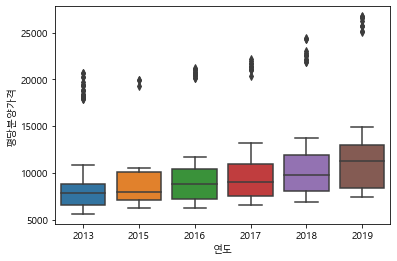

In [209]:
sns.boxplot(data=df,x="연도",y="평당분양가격")

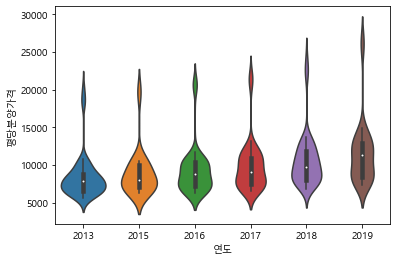

In [210]:
sns.violinplot(data=df,x="연도",y="평당분양가격")

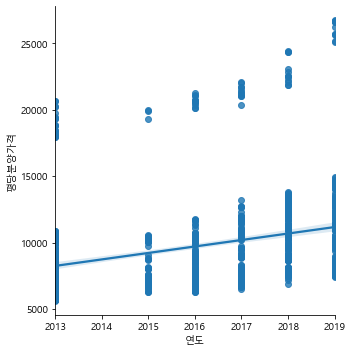

In [211]:
sns.lmplot(data=df,x="연도",y="평당분양가격")

E:\anaconda\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
E:\anaconda\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


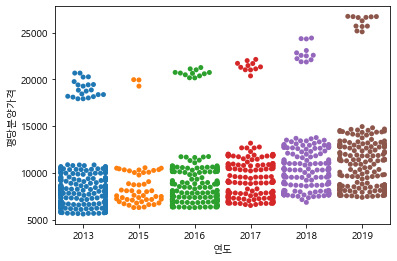

In [212]:
sns.swarmplot(data=df,x="연도",y="평당분양가격")

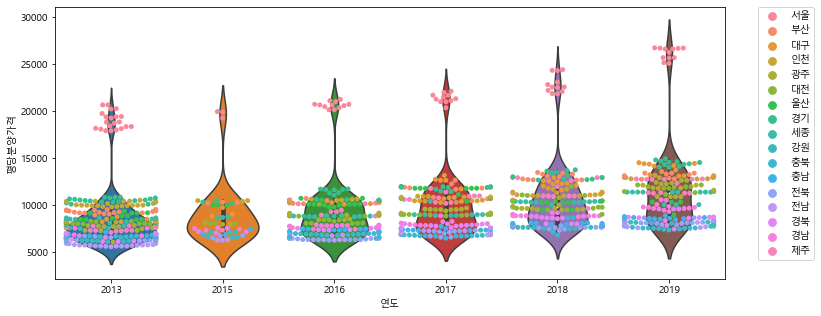

In [217]:
plt.figure(figsize=(12,5))
sns.violinplot(data=df,x="연도",y="평당분양가격")
sns.swarmplot(data=df,x="연도",y="평당분양가격",hue="지역명")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

* 이상치들은 모두 서울 가격임을 파악

### 지역별 평당분양가격

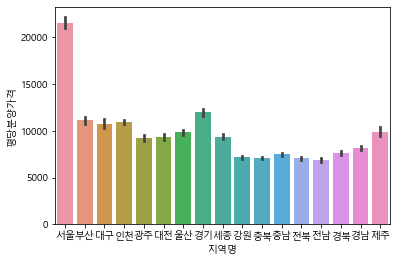

In [219]:
sns.barplot(data=df,x="지역명",y="평당분양가격")

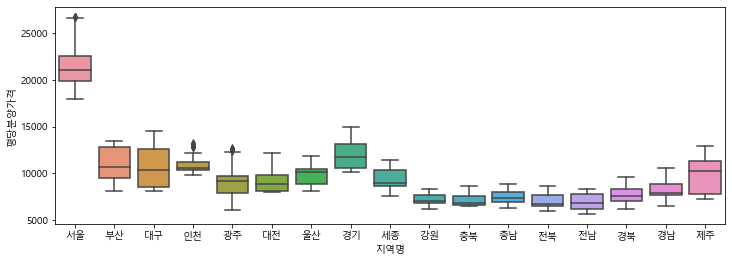

In [220]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df,x="지역명",y="평당분양가격")

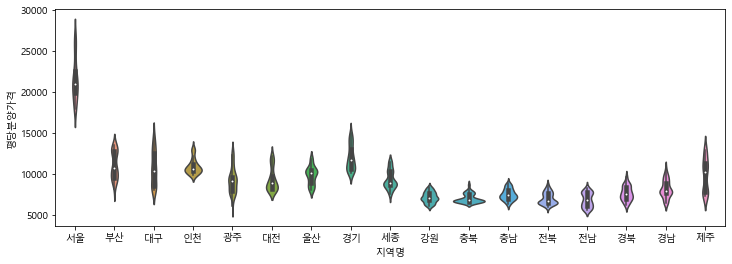

In [221]:
plt.figure(figsize=(12,4))
sns.violinplot(data=df,x="지역명",y="평당분양가격")

E:\anaconda\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
E:\anaconda\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


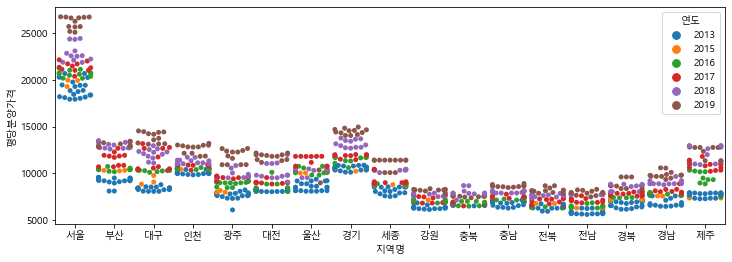

In [222]:
plt.figure(figsize=(12,4))
sns.swarmplot(data=df,x="지역명",y="평당분양가격",hue="연도")